In [1]:
# All the imports needed

# Data Manipulation
import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


KeyboardInterrupt



In [2]:
#讀取CSV檔
student = pd.read_csv("./Students' Academic Performance Dataset.csv") 

In [3]:
student.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
# Show null counts and data types
student.info()

#性別、國籍、出生地、階段、年級、部分、主題、學期、關係人、舉手次數、訪問資源次數、
#查看公告次數、討論次數、家長回答調查、家長對學校的滿意度、學生曠課天數、程度區間

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

<AxesSubplot:xlabel='Class', ylabel='count'>

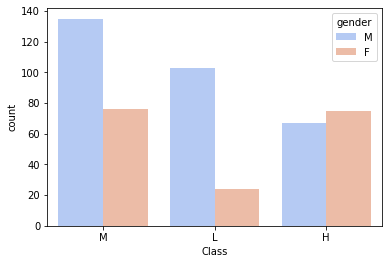

In [5]:
# Student class by gender
sns.countplot(x='Class',hue='gender',data=student,palette='coolwarm')

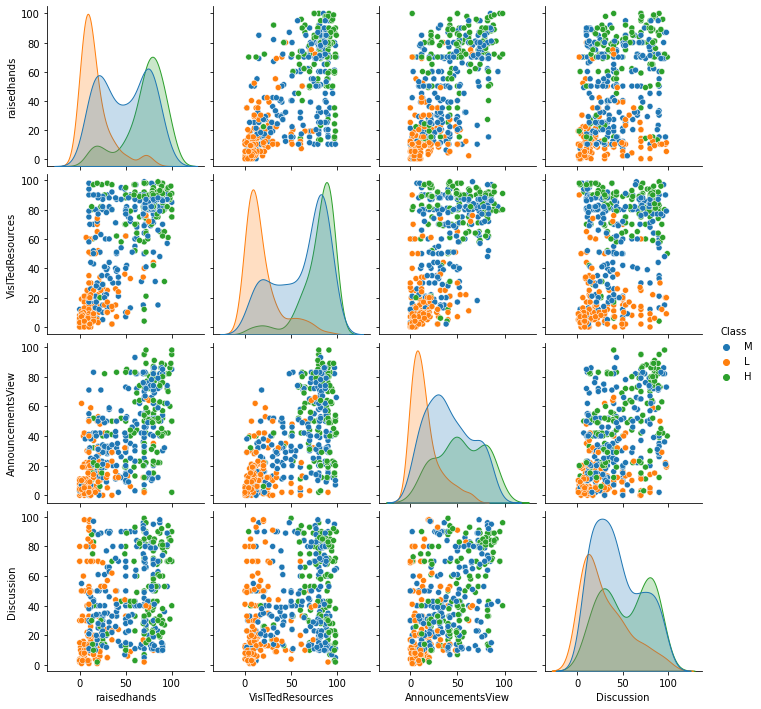

In [6]:
# Countplot based on the student Class
sns.pairplot(student,hue='Class')

In [7]:
y = student['Class']
student=student.drop(['Class'],axis=1)


In [8]:
# Replacing categorical values to numerical
student["gender"]=np.where(student["gender"]=="F", 1,0)
student["Semester"]=np.where(student["Semester"]=="S", 1,0)
student["Relation"]=np.where(student["Relation"]=="Father", 1,0)
student["ParentAnsweringSurvey"]=np.where(student["ParentAnsweringSurvey"]=="Yes", 1,0)
student["ParentschoolSatisfaction"]=np.where(student["ParentschoolSatisfaction"]=="Good", 1,0)
student["StudentAbsenceDays"]=np.where(student["StudentAbsenceDays"]=="Under-7", 1,0)

StageID_mapping = {'lowerlevel':1,'MiddleSchool':2,'HighSchool':3}
student["StageID"] = student["StageID"].map(StageID_mapping)

SectionID_mapping = {'A':3,'B':2,'C':1}
student["SectionID"] = student["SectionID"].map(SectionID_mapping)

#use get_dummies to convert categorical values and concatenate them later
student = pd.get_dummies(student, prefix="")

In [9]:
# Check all the columns
student.columns

Index(['gender', 'StageID', 'SectionID', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', '_Egypt', '_Iran', '_Iraq', '_Jordan', '_KW',
       '_Lybia', '_Morocco', '_Palestine', '_SaudiArabia', '_Syria', '_Tunis',
       '_USA', '_lebanon', '_venzuela', '_Egypt', '_Iran', '_Iraq', '_Jordan',
       '_KuwaIT', '_Lybia', '_Morocco', '_Palestine', '_SaudiArabia', '_Syria',
       '_Tunis', '_USA', '_lebanon', '_venzuela', '_G-02', '_G-04', '_G-05',
       '_G-06', '_G-07', '_G-08', '_G-09', '_G-10', '_G-11', '_G-12',
       '_Arabic', '_Biology', '_Chemistry', '_English', '_French', '_Geology',
       '_History', '_IT', '_Math', '_Quran', '_Science', '_Spanish'],
      dtype='object')

## Scaling the data

In [10]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(student)
scaled = scaler.transform(student)

## Train Test Split

In [11]:
X = scaled
# split the data to 20% test,80% train with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Models

### - Random Forest Classifier
- Finding best number of estimators
* (If n_estimators is too small, it will underfit.)
* (If n_estimators is too large, it will overfit.)

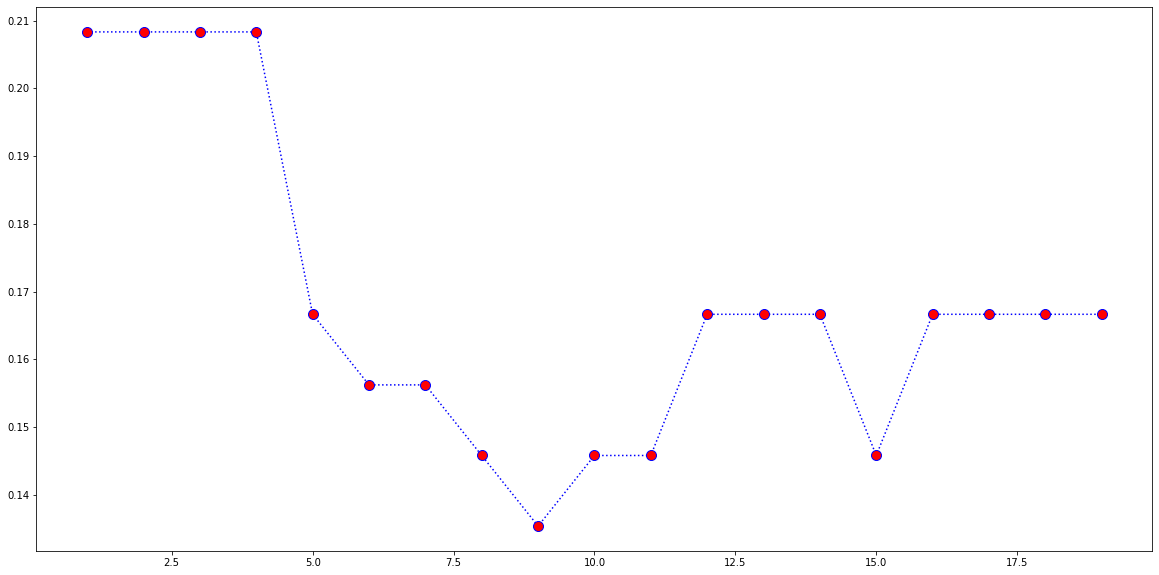

In [12]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 40
    rfe = RandomForestClassifier(n_estimators=i*10,random_state=42) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

- Training the model

In [13]:
rfc = RandomForestClassifier(n_estimators=90,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

[Random Forest Classifier]

              precision    recall  f1-score   support

           H       0.83      0.68      0.75        22
           L       0.88      0.88      0.88        26
           M       0.81      0.88      0.84        48

    accuracy                           0.83        96
   macro avg       0.84      0.81      0.82        96
weighted avg       0.83      0.83      0.83        96



[Confusion matrix]

AxesSubplot(0.125,0.125;0.62x0.755)


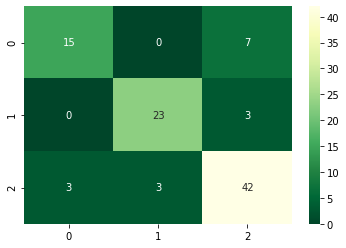

In [14]:
print('[Random Forest Classifier]\n')
print(classification_report(y_test,rfcpred))

print('\n')

print('[Confusion matrix]\n')
print(sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g'))

### - Desicion Tree Classifier

In [15]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1, random_state=1)
dt.fit(X_train,y_train)
dtpred = dt.predict(X_test)

[Desicion Tree Classifier]

              precision    recall  f1-score   support

           H       0.69      0.82      0.75        22
           L       0.88      0.88      0.88        26
           M       0.89      0.81      0.85        48

    accuracy                           0.83        96
   macro avg       0.82      0.84      0.83        96
weighted avg       0.84      0.83      0.84        96



[Confusion matrix]

AxesSubplot(0.125,0.125;0.62x0.755)


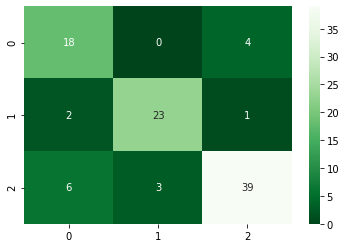

In [16]:
print('[Desicion Tree Classifier]\n')
print(classification_report(y_test,dtpred))

print('\n')

print('[Confusion matrix]\n')
print(sns.heatmap(confusion_matrix(y_test,dtpred),cmap='Greens_r',annot=True,fmt='g'))

### - Support Vector Classifier

In [17]:
svc = SVC(C=90,random_state=32)
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)

[Support Vector Classifier]

              precision    recall  f1-score   support

           H       0.75      0.82      0.78        22
           L       0.84      0.81      0.82        26
           M       0.81      0.79      0.80        48

    accuracy                           0.80        96
   macro avg       0.80      0.81      0.80        96
weighted avg       0.80      0.80      0.80        96



[Confusion matrix]

AxesSubplot(0.125,0.125;0.62x0.755)


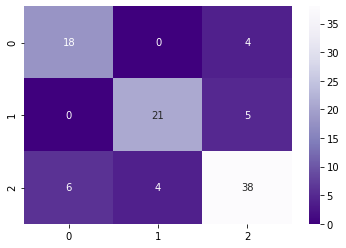

In [18]:
print('[Support Vector Classifier]\n')
print(classification_report(y_test,svcpred))

print('\n')

print('[Confusion matrix]\n')
print(sns.heatmap(confusion_matrix(y_test,svcpred),cmap='Purples_r',annot=True,fmt='g'))

### - KNN classifier
 - Choosing K value

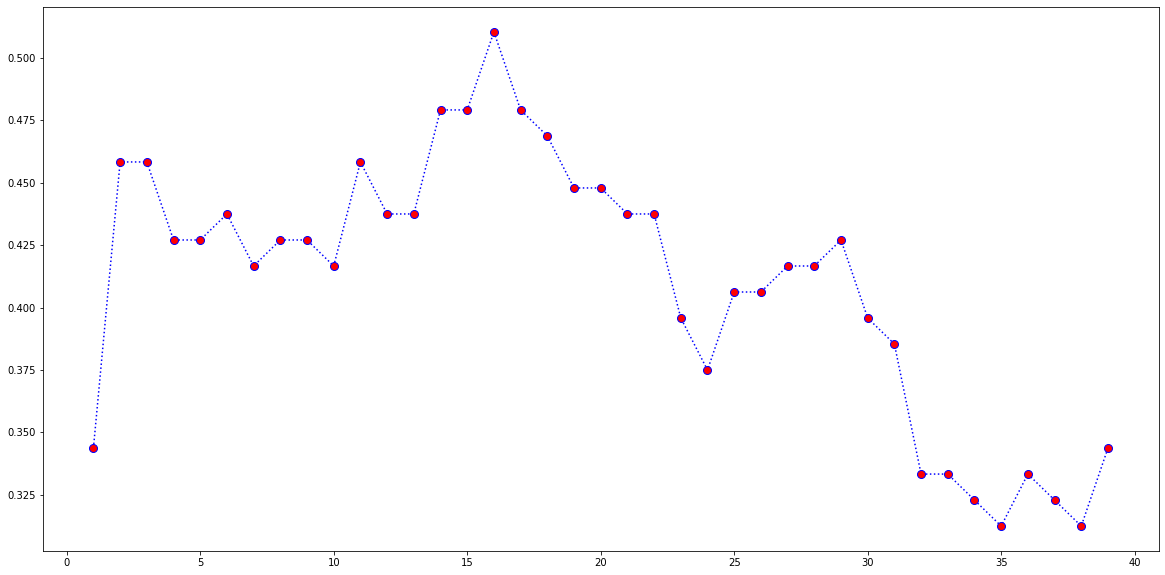

In [19]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
    # Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

 - Training the model

In [20]:
# We didn't choose 1 as it's so sensetive to just rely on 1 neighbor
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

K Nearest Neighbours

              precision    recall  f1-score   support

           H       0.71      0.45      0.56        22
           L       0.66      0.81      0.72        26
           M       0.70      0.73      0.71        48

    accuracy                           0.69        96
   macro avg       0.69      0.66      0.66        96
weighted avg       0.69      0.69      0.68        96



Confusion matrix


<AxesSubplot:>

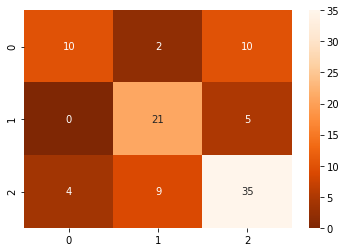

In [21]:
print('K Nearest Neighbours' + '\n')
print(classification_report(y_test,knnpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,knnpred),cmap='Oranges_r',annot=True,fmt='g')

### - Logistic Regression

In [22]:
Lr = LogisticRegression(C=1,max_iter=100,multi_class='auto',random_state=1)
Lr.fit(X_train,y_train)
Lrpred = Lr.predict(X_test)

[Logistic Regression]

              precision    recall  f1-score   support

           H       0.67      0.64      0.65        22
           L       0.84      0.81      0.82        26
           M       0.74      0.77      0.76        48

    accuracy                           0.75        96
   macro avg       0.75      0.74      0.74        96
weighted avg       0.75      0.75      0.75        96



[Confusion matrix]



<AxesSubplot:>

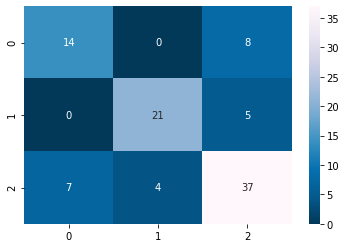

In [23]:
print('[Logistic Regression]\n')
print(classification_report(y_test,Lrpred))
print('\n')
print('[Confusion matrix]\n')
sns.heatmap(confusion_matrix(y_test,Lrpred),cmap='PuBu_r',annot=True,fmt='g')

## Features importance

<AxesSubplot:>

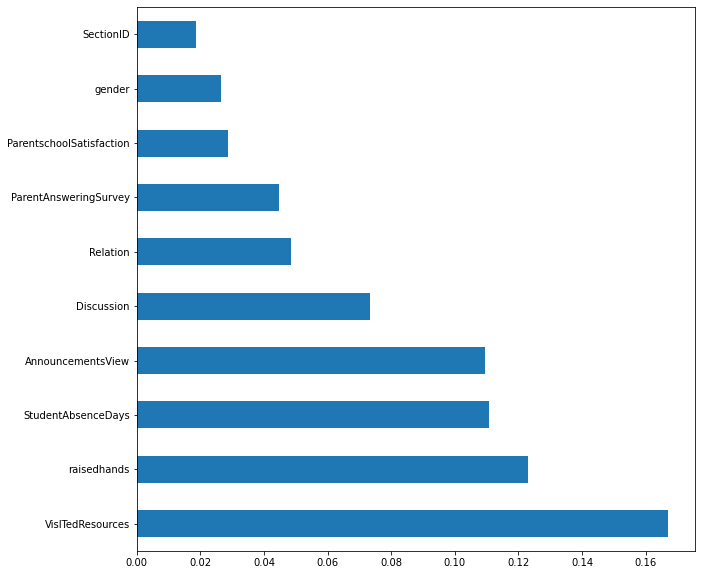

In [24]:
plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=student.columns)
importance.nlargest(10).plot(kind='barh')

In [25]:
student = student[['VisITedResources','raisedhands','StudentAbsenceDays','AnnouncementsView','Discussion','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','gender','SectionID']]
student

,VisITedResources,raisedhands,StudentAbsenceDays,AnnouncementsView,Discussion,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,gender,SectionID
0,16,15,1,2,20,1,1,1,0,3
1,20,20,1,3,25,1,1,1,0,3
2,7,10,0,0,30,1,0,0,0,3
3,25,30,0,5,35,1,0,0,0,3
4,50,40,0,12,50,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
475,4,5,0,5,8,1,0,0,1,3
476,77,50,1,14,28,1,0,0,1,3
477,74,55,1,25,29,1,0,0,1,3
478,17,30,0,14,57,1,0,0,1,3


In [26]:
scaler = StandardScaler()
scaler.fit(student)
scaled = scaler.transform(student)

In [27]:
X = scaled
# split the data to 20% test,80% train with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

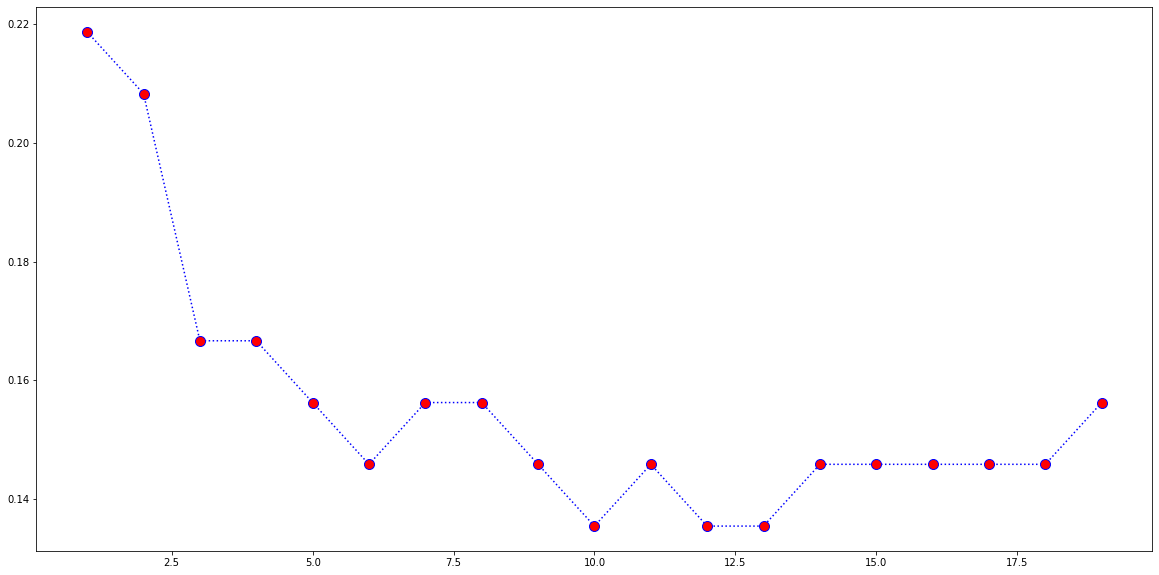

In [28]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 40
    rfe = RandomForestClassifier(n_estimators=i*10,random_state=42) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

In [29]:
rfc = RandomForestClassifier(n_estimators=120,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

[Random Forest Classifier]

              precision    recall  f1-score   support

           H       0.85      0.77      0.81        22
           L       0.89      0.96      0.93        26
           M       0.88      0.88      0.88        48

    accuracy                           0.88        96
   macro avg       0.87      0.87      0.87        96
weighted avg       0.87      0.88      0.87        96



[Confusion matrix]



<AxesSubplot:>

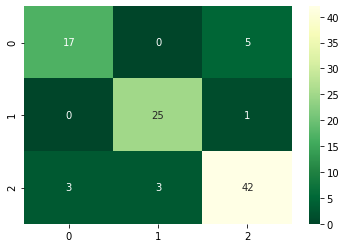

In [30]:
print('[Random Forest Classifier]\n')
print(classification_report(y_test,rfcpred))

print('\n')

print('[Confusion matrix]\n')
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g')

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

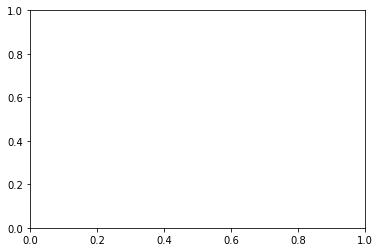

In [31]:
from sklearn.cluster import KMeans
kmX = student[['VisITedResources','raisedhands']]
# Class = pd.DataFrame(y)
# Class_mapping = {'L':0,'M':1,'H':2}
# Class["Class"] = Class["Class"].map(Class_mapping)
# kmX = pd.DataFrame((student['VisITedResources']+student['raisedhands'])/2)

# kmX = pd.concat([kmX,Class],axis=1)
# kmX.rename(columns={'0':'AvgPerformance'},inplace=True)
distortions = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(kmX)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

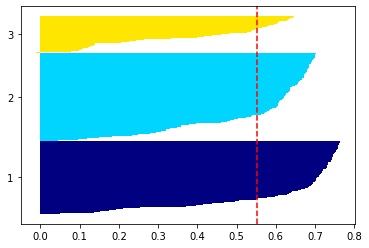

In [32]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples #計算silhouette分數 -1-1之間 越接近0代表此樣本分得不好

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(kmX)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]                #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan
silhouette_vals = silhouette_samples(kmX, y_km, metric='euclidean') #歐式距離 
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)

plt.show()

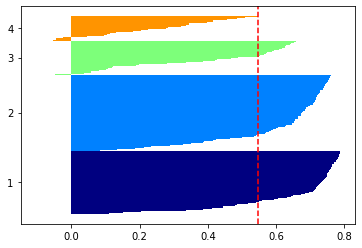

In [33]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples #計算silhouette分數 -1-1之間 越接近0代表此樣本分得不好

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(kmX)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]                #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan
silhouette_vals = silhouette_samples(kmX, y_km, metric='euclidean') #歐式距離 
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)

plt.show()

In [34]:
# k-means++
%matplotlib inline
from sklearn.cluster import KMeans
Class = pd.DataFrame(y)
Class_mapping = {'L':0,'M':1,'H':2}
Class["Class"] = Class["Class"].map(Class_mapping)

Xcluster = pd.concat([kmX,Class],axis=1)

#(1)name and defind the model
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
#(2)training
km.fit(kmX)
#(3)prediction
pred_cluster = km.predict(kmX)


Xcluster["Cluster"] = pred_cluster
# Xcluster.loc[Xcluster['Class'] != Xcluster['Cluster']]

Xcluster.sort_values(by='Class') 

,VisITedResources,raisedhands,Class,Cluster
479,14,35,0,0
115,8,0,0,0
373,9,5,0,0
372,20,10,0,0
235,8,12,0,0
...,...,...,...,...
146,75,100,2,1
143,90,80,2,1
344,97,14,2,2
170,62,40,2,2


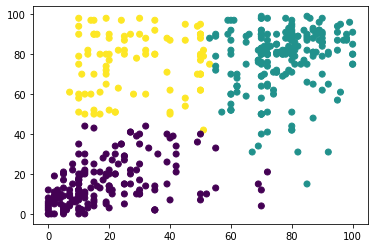

In [35]:
plt.scatter(Xcluster['raisedhands'],Xcluster['VisITedResources'],c=km.predict(kmX))

In [36]:
from sklearn import  metrics
silhouette_avg = metrics.silhouette_score(Xcluster, km.labels_)
print(silhouette_avg)
# The best value is 1 and the worst value is -1.

0.5512979727145855


# Deep Learning

In [37]:
data = pd.read_csv("./Students' Academic Performance Dataset.csv")
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [38]:
# 查看各欄位的數值有幾種組合
for c in data.columns:
  print(f"{c} set num: {len(set(data[c]))}")

gender set num: 2
NationalITy set num: 14
PlaceofBirth set num: 14
StageID set num: 3
GradeID set num: 10
SectionID set num: 3
Topic set num: 12
Semester set num: 2
Relation set num: 2
raisedhands set num: 82
VisITedResources set num: 89
AnnouncementsView set num: 88
Discussion set num: 90
ParentAnsweringSurvey set num: 2
ParentschoolSatisfaction set num: 2
StudentAbsenceDays set num: 2
Class set num: 3


In [39]:
data = data.drop(columns=['NationalITy', 'PlaceofBirth', 'Topic'])
data

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,A,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,A,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,A,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,A,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,G-08,A,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,MiddleSchool,G-08,A,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,MiddleSchool,G-08,A,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,MiddleSchool,G-08,A,F,Father,30,17,14,57,No,Bad,Above-7,L


In [40]:
# no missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   StageID                   480 non-null    object
 2   GradeID                   480 non-null    object
 3   SectionID                 480 non-null    object
 4   Semester                  480 non-null    object
 5   Relation                  480 non-null    object
 6   raisedhands               480 non-null    int64 
 7   VisITedResources          480 non-null    int64 
 8   AnnouncementsView         480 non-null    int64 
 9   Discussion                480 non-null    int64 
 10  ParentAnsweringSurvey     480 non-null    object
 11  ParentschoolSatisfaction  480 non-null    object
 12  StudentAbsenceDays        480 non-null    object
 13  Class                     480 non-null    object
dtypes: int64(4), object(10)
me

In [41]:
data.columns

Index(['gender', 'StageID', 'GradeID', 'SectionID', 'Semester', 'Relation',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

## Encoding

In [42]:
# Binary Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data_le = data
for col in data[['gender', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey',
          'ParentschoolSatisfaction', 'StudentAbsenceDays']]:
  data_le[col] = lb.fit_transform(data[col])
data_le

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,lowerlevel,G-04,0,0,0,15,16,2,20,1,1,1,M
1,1,lowerlevel,G-04,0,0,0,20,20,3,25,1,1,1,M
2,1,lowerlevel,G-04,0,0,0,10,7,0,30,0,0,0,L
3,1,lowerlevel,G-04,0,0,0,30,25,5,35,0,0,0,L
4,1,lowerlevel,G-04,0,0,0,40,50,12,50,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,MiddleSchool,G-08,0,1,0,5,4,5,8,0,0,0,L
476,0,MiddleSchool,G-08,0,0,0,50,77,14,28,0,0,1,M
477,0,MiddleSchool,G-08,0,1,0,55,74,25,29,0,0,1,M
478,0,MiddleSchool,G-08,0,0,0,30,17,14,57,0,0,0,L


In [43]:
# Encoded StageID columns
data['StageID'] = data['StageID'].map({'lowerlevel':0, 'MiddleSchool':1, 'HighSchool':2})

In [44]:
# Encoded GradeID columns
print(set(data['GradeID']))
data_le['GradeID'] = data['GradeID'].map({'G-07':7, 'G-12':12, 'G-10':10, 'G-11':11, 
                      'G-06':6, 'G-09':9, 'G-02':2, 'G-05':5, 
                      'G-04':4, 'G-08':8})
data_le['GradeID']

{'G-02', 'G-07', 'G-09', 'G-06', 'G-12', 'G-08', 'G-04', 'G-11', 'G-10', 'G-05'}


0      4
1      4
2      4
3      4
4      4
      ..
475    8
476    8
477    8
478    8
479    8
Name: GradeID, Length: 480, dtype: int64

In [45]:
# 將Class欄位 'L'->0、'M'->1、'H'->2
print(set(data['Class']))
data_le['Class'] = data_le['Class'].map({'L':0, 'M':1, 'H':2})
print(set(data['Class']))

{'H', 'L', 'M'}
{0, 1, 2}


In [46]:
data_le

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,0,4,0,0,0,15,16,2,20,1,1,1,1
1,1,0,4,0,0,0,20,20,3,25,1,1,1,1
2,1,0,4,0,0,0,10,7,0,30,0,0,0,0
3,1,0,4,0,0,0,30,25,5,35,0,0,0,0
4,1,0,4,0,0,0,40,50,12,50,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,1,8,0,1,0,5,4,5,8,0,0,0,0
476,0,1,8,0,0,0,50,77,14,28,0,0,1,1
477,0,1,8,0,1,0,55,74,25,29,0,0,1,1
478,0,1,8,0,0,0,30,17,14,57,0,0,0,0


In [47]:
data_le.describe()

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,0.654167,5.600000,0.472917,0.489583,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,1.031250
std,0.481815,0.603732,2.840653,0.612411,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.748738
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,2.000000,12.000000,2.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000


# Standardlized

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ML_data = pd.DataFrame(scaler.fit_transform(data_le.iloc[:, 6:10]),
                       columns=data_le.iloc[:, 6:10].keys())
ML_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-1.033429,-1.174075,-1.351167,-0.843326
1,-0.870813,-1.053029,-1.313549,-0.662225
2,-1.196046,-1.446426,-1.426401,-0.481125
3,-0.545579,-0.901723,-1.238315,-0.300024
4,-0.220346,-0.145191,-0.974994,0.243279
...,...,...,...,...
475,-1.358663,-1.537210,-1.238315,-1.277968
476,0.104888,0.671863,-0.899759,-0.553565
477,0.267505,0.581080,-0.485969,-0.517345
478,-0.545579,-1.143813,-0.899759,0.496820


### Feature

In [67]:
X = pd.DataFrame(data_le.iloc[:,:-1])
X

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,0,4,0,0,0,15,16,2,20,1,1,1
1,1,0,4,0,0,0,20,20,3,25,1,1,1
2,1,0,4,0,0,0,10,7,0,30,0,0,0
3,1,0,4,0,0,0,30,25,5,35,0,0,0
4,1,0,4,0,0,0,40,50,12,50,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,1,8,0,1,0,5,4,5,8,0,0,0
476,0,1,8,0,0,0,50,77,14,28,0,0,1
477,0,1,8,0,1,0,55,74,25,29,0,0,1
478,0,1,8,0,0,0,30,17,14,57,0,0,0


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X.iloc[:, 2:3] = scaler.fit_transform(X.iloc[:, 2:3])
X.iloc[:, 6:10] = scaler.fit_transform(X.iloc[:, 6:10])
X

,gender,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,0,0.2,0,0,0,0.15,0.161616,0.020408,0.193878,1,1,1
1,1,0,0.2,0,0,0,0.20,0.202020,0.030612,0.244898,1,1,1
2,1,0,0.2,0,0,0,0.10,0.070707,0.000000,0.295918,0,0,0
3,1,0,0.2,0,0,0,0.30,0.252525,0.051020,0.346939,0,0,0
4,1,0,0.2,0,0,0,0.40,0.505051,0.122449,0.500000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,1,0.6,0,1,0,0.05,0.040404,0.051020,0.071429,0,0,0
476,0,1,0.6,0,0,0,0.50,0.777778,0.142857,0.275510,0,0,1
477,0,1,0.6,0,1,0,0.55,0.747475,0.255102,0.285714,0,0,1
478,0,1,0.6,0,0,0,0.30,0.171717,0.142857,0.571429,0,0,0


### Target

In [84]:
y = data_le['Class'].values
y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0,
       1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1,
       0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0,

### Data Split

In [85]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

## Create DL Model

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout

Num, Col = X_train.shape

model = Sequential()
model.add(Dense(5, input_shape=(Col,), activation=LeakyReLU(alpha=0.5)))
model.add(Dense(5, activation=LeakyReLU(alpha=0.5)))
model.add(Dense(3, activation='softmax')) # 預測三種類別的機率加總和為1

optimizer = Adam(learning_rate=0.001)
# optimizer = SGD(learning_rate=0.001) #, momentum=0.9, nesterov=True
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # sparse_categorical_crossentropy
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 70        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 3)                 18        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(X_train, y_train, batch_size=6, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
56/56 [==============================] - 1s 5ms/step - loss: 1.1649 - accuracy: 0.3423 - val_loss: 1.0809 - val_accuracy: 0.4236
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.3929 - val_loss: 1.0673 - val_accuracy: 0.3889
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0477 - accuracy: 0.4137 - val_loss: 1.0518 - val_accuracy: 0.3889
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0250 - accuracy: 0.4345 - val_loss: 1.0228 - val_accuracy: 0.3958
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0035 - accuracy: 0.4494 - val_loss: 0.9984 - val_accuracy: 0.4167
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9786 - accuracy: 0.4643 - val_loss: 0.9754 - val_accuracy: 0.4097
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9494 - accuracy: 0.5030 - val_loss: 0.9314 - val_accuracy: 0.4653
Epoch 8/150
5

In [88]:
y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 0s 2ms/step


array([[1.86060224e-05, 6.72353953e-02, 9.32745993e-01],
       [3.36170274e-06, 5.13313748e-02, 9.48665202e-01],
       [9.49564278e-01, 5.03499657e-02, 8.56725019e-05],
       [8.09938908e-01, 1.86393365e-01, 3.66771710e-03],
       [3.02982656e-03, 8.64827394e-01, 1.32142738e-01],
       [2.76936102e-04, 3.66039991e-01, 6.33683085e-01],
       [1.98694790e-04, 1.75091758e-01, 8.24709475e-01],
       [8.46412838e-01, 1.53172269e-01, 4.14919516e-04],
       [1.74683437e-01, 7.72686303e-01, 5.26302867e-02],
       [7.77867138e-01, 2.21176788e-01, 9.56091390e-04],
       [4.17896748e-01, 5.77573478e-01, 4.52971365e-03],
       [1.43170881e-04, 2.94040978e-01, 7.05815911e-01],
       [1.81935029e-03, 3.66348445e-01, 6.31832182e-01],
       [2.27718711e-01, 7.29075193e-01, 4.32061814e-02],
       [1.95324933e-03, 4.39161241e-01, 5.58885455e-01],
       [1.27869367e-04, 1.73716724e-01, 8.26155365e-01],
       [9.08466220e-01, 9.07987207e-02, 7.35101115e-04],
       [7.87345111e-01, 2.10027

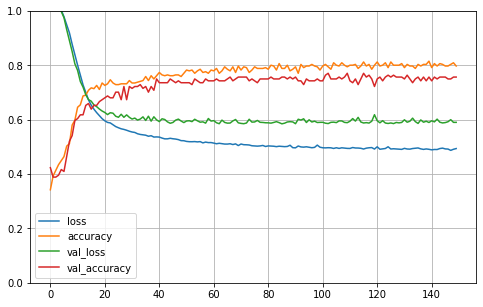

In [89]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Summary

Here is a summary of best accuracy I could get from each model
- Random Forest Classifier 83%
- Desicion Tree Classifier 83%
- Support Vector Classifier 80%
- Logistic Regression 75%
- KNN 69%
- modified Random Forest Classifier 88%
------------------------------------
Deep Learning
- ANN model 預測每位學生所屬類別
- train_acc: 0.8185
- train_loss: 0.4487
- val_acc: 0.7778
- val_loss: 0.5783